<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/A_question_of_going_down_MtFuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Acquisition of elevation data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
fuji = pd.read_csv('https://raw.githubusercontent.com/lunu5/diveintocode-ml/master/mtfuji_data.csv')

#[Problem 1] Visualization of data

In [2]:
fuji.iloc[100:]

,x,lat,lng,elevation,distance
100,100,35.302218,138.843458,772.58,32221
101,101,35.303895,138.840565,795.25,32544
102,102,35.305572,138.837673,817.62,32866
103,103,35.307249,138.834781,858.62,33188
104,104,35.308926,138.831888,883.89,33510
...,...,...,...,...,...
295,295,35.627957,138.277199,1918.24,95054
296,296,35.629620,138.274284,1944.63,95376
297,297,35.631284,138.271368,1973.99,95698
298,298,35.632947,138.268452,1841.36,96020


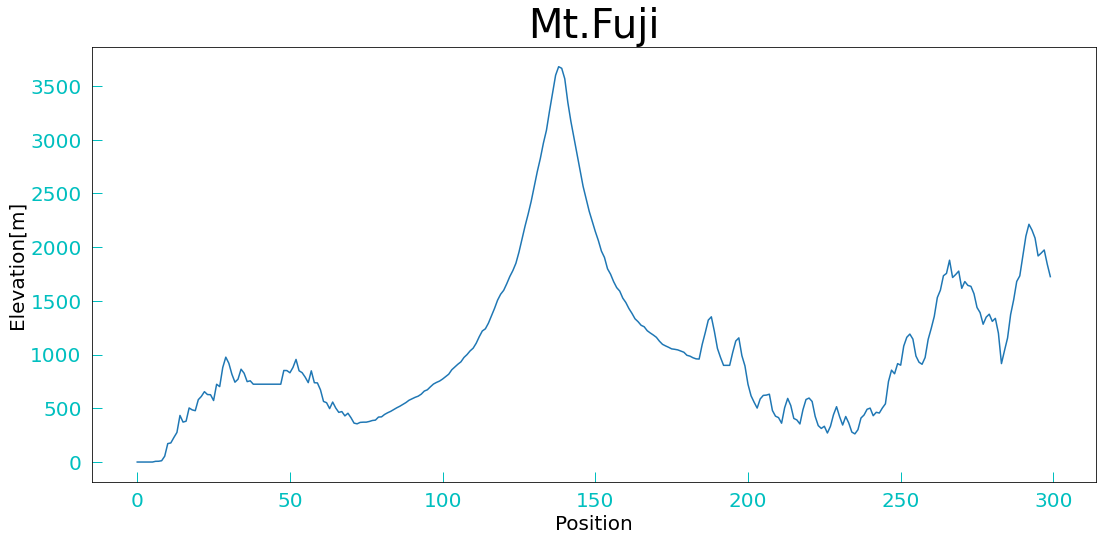

In [3]:
plt.figure(figsize=(18, 8))
plt.title("Mt.Fuji", fontsize = 40)
plt.xlabel("Position", fontsize = 20)
plt.ylabel("Elevation[m]", fontsize = 20)
plt.tick_params(direction = 'in', length = 10, width = 1, pad = 10, labelsize = 20, colors = 'c')
plt.plot(fuji.iloc[:, 0], fuji.iloc[:, 3])
plt.show()

#[Problem 2] Create a function to calculate the slope of a point

In [4]:
def compute_gradient(data, x, last_x):
    """
    Calculate the gradient based on the relationship between the "current point" and the "previous point".
    Parameters
    ----------------
    x : int
      Poitions.
    y : float
      Elezvation[m].

    Returns
    ----------------
    Gradient of the current point
    """
    try:
      gradient = (data.iloc[x, 3] - data.iloc[last_x, 3])/(data.iloc[x, 0] - data.iloc[last_x, 0])
    except ZeroDivisionError as err:
      return 0
    return gradient

#[Problem 3] Create a function to calculate the destination

In [5]:
def compute_destination(x, gradient, direction, alpha):
    """
    Calculate the gradient based on the relationship between the "current point" and the "previous point".
    Parameters
    ----------------
    x : int
      Current point.
    gradient : float
      Slope at current point.
    direction : bool
      Direction (left or right)
    alpha : float
      Hyperparameter

    Returns
    ----------------
    Destination point.
    """
    if direction == 1:
      try:
        return round(x - abs(alpha*gradient)) if round(x - abs(alpha*gradient)) > 0 else 0
      except ValueError:
        return x - 1 if x > 1 else 0
    else:
      try:
        return round(x + abs(alpha*gradient)) if round(x + abs(alpha*gradient)) < 299 else 299
      except ValueError:
        return x + 1 if x < 298 else 299

#[Problem 4] Creating a function to go down the mountain

In [6]:
def go_down_Fuji(data, x, alpha):
    """
    Estimate Fuji cross section.
    Parameters
    ----------------
    data : dataFrame
      Fuji dataset
    x : int
      Initial point
    alpha : float
      Hyperparameter

    Returns
    ----------------
    location: list
      Locations list
    """
    last_x = x + 1
    y = data.iloc[x, 3]
    direction = 1 if x < np.argmax(data.iloc[:, 3]) else 0
    x_list = [x]
    y_list = [y]
    gradient_list = []
    while True:
      gradient = compute_gradient(data, x, last_x)
      last_x = x
      x = compute_destination(x, gradient, direction, alpha)
      y = data.iloc[x, 3]
      x_list.append(x)
      y_list.append(y)
      gradient_list.append(gradient)
      if y <= 0 or x <= 0 or x >= 299: 
        gradient_list.append(0)
        return np.column_stack((x_list, y_list, gradient_list))
alpha1 = 0.2
location1 = go_down_Fuji(fuji, 136, alpha1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


#[Problem 5] Visualization of the descent process

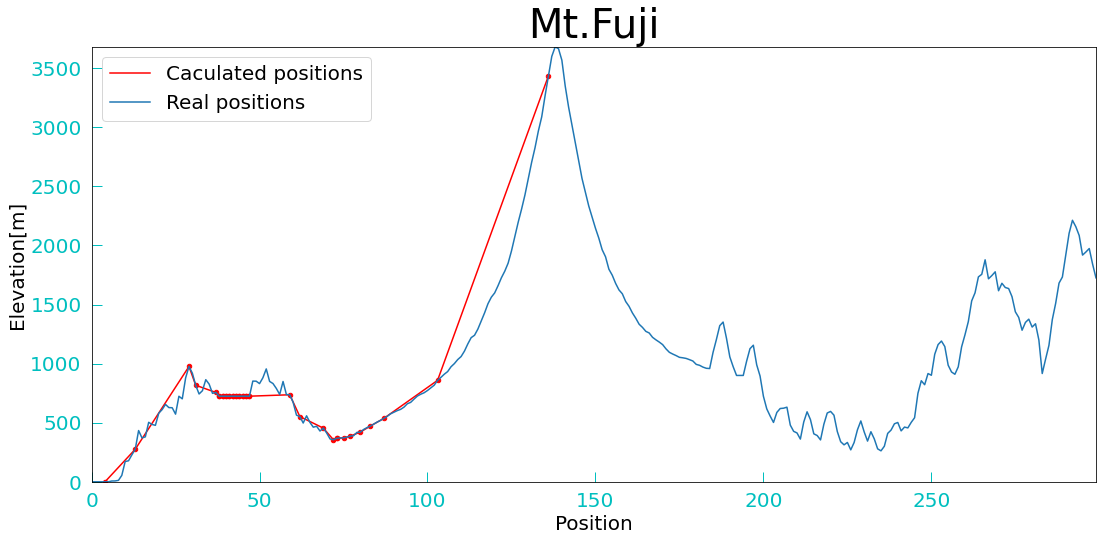

In [7]:
def plot_graph(data):
  plt.figure(figsize=(18, 8))
  plt.title("Mt.Fuji", fontsize = 40)
  plt.xlabel("Position", fontsize = 20)
  plt.ylabel("Elevation[m]", fontsize = 20)
  plt.tick_params(direction = 'in', length = 10, width = 1, pad = 10, labelsize = 20, colors = 'c')
  plt.scatter(data[:, 0], data[:, 1],c = 'r', s = 20)
  plt.plot(data[:, 0], data[:, 1], 'r', label = 'Caculated positions')
  plt.plot(fuji.iloc[:, 0], fuji.iloc[:, 3], label = 'Real positions')
  plt.legend(loc = 'upper left', fontsize = 20);
  plt.xlim(np.min(fuji.iloc[:, 0]), np.max(fuji.iloc[:, 0]))
  plt.ylim(np.min(fuji.iloc[:, 3]), np.max(fuji.iloc[:, 3]))
  plt.show()
plot_graph(location1)

#[Problem 6] Change of initial value
This time the initial point is 142

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


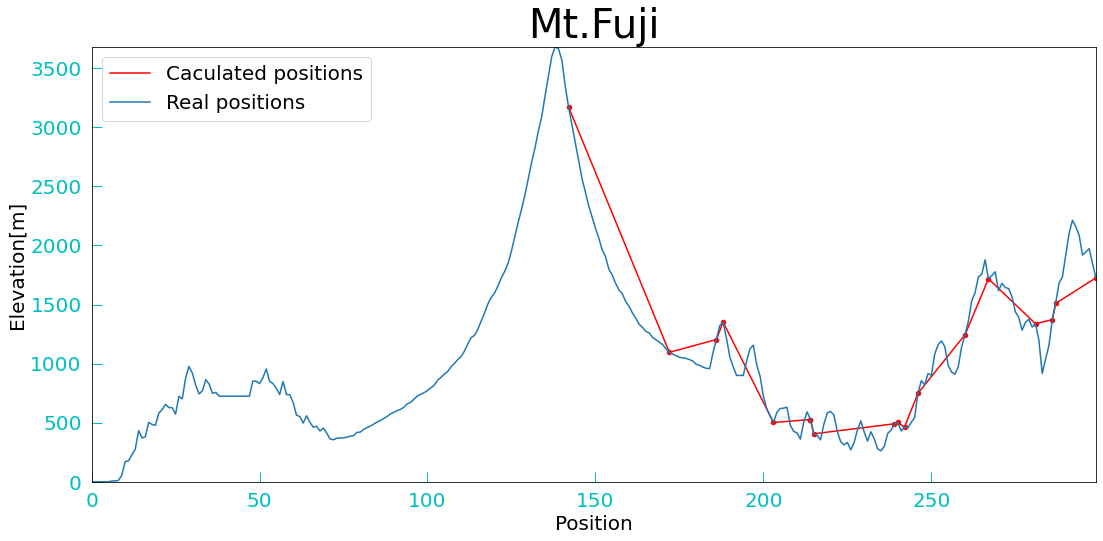

In [8]:
location2 = go_down_Fuji(fuji, 142, alpha1)
plot_graph(location2)

#[Problem 7] (Advance problem) Change hyperparameters
The hyperparameter will be 0.05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


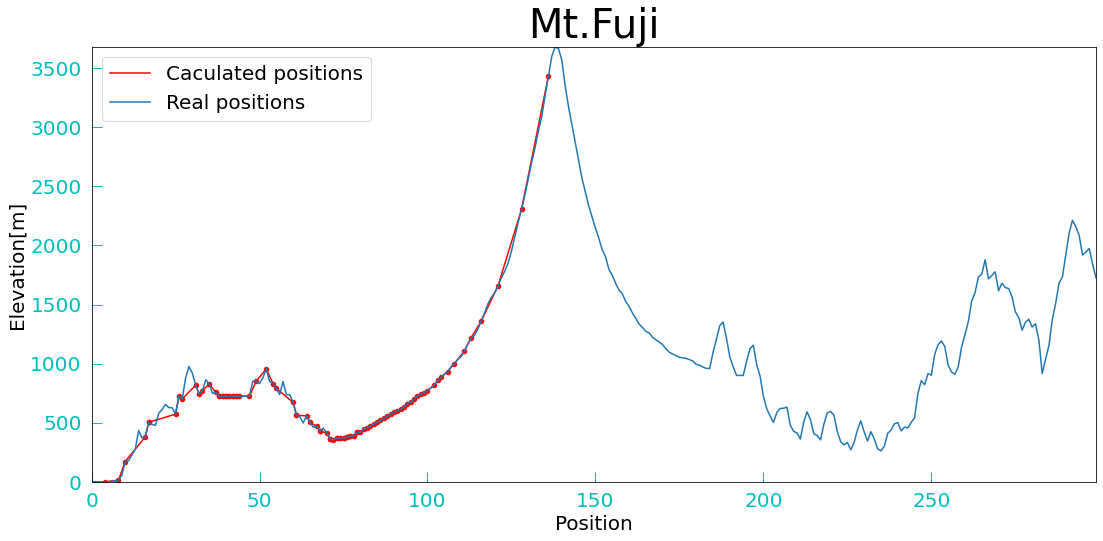

In [9]:
alpha2 = 0.05
location3 = go_down_Fuji(fuji, 136, alpha2)
plot_graph(location3)